In [1]:
import os
import numpy as np
import pandas
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pandas.read_csv('/Users/jakevogel/Science/multimodal/basc/n86_4mod_z_2017/sc8_multimodal_z_vals.csv')
df.index = df[df.columns[0]]
df.drop(df.columns[0],axis=1,inplace=True)
df.head()

,mod_0_cluster1,mod_0_cluster2,mod_0_cluster3,mod_0_cluster4,mod_0_cluster5,mod_0_cluster6,mod_0_cluster7,mod_0_cluster8,mod_1_cluster1,mod_1_cluster2,...,mod_2_cluster7,mod_2_cluster8,mod_3_cluster1,mod_3_cluster2,mod_3_cluster3,mod_3_cluster4,mod_3_cluster5,mod_3_cluster6,mod_3_cluster7,mod_3_cluster8
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
96,-0.410836,0.470900,0.347316,0.438663,0.278095,0.967562,0.573761,-0.174845,0.617833,-0.017797,...,0.166999,0.076546,-0.837469,-0.147124,0.021165,-0.512365,0.032903,0.092480,-0.104031,-0.343031
112,-0.756187,-0.406419,-0.164952,-0.321789,-0.380146,-0.555117,-0.249894,0.069185,0.099888,0.922872,...,0.703175,0.617037,0.164908,0.508242,0.714972,0.465091,0.538445,0.525107,0.520196,0.405853
142,-0.599333,-0.434926,-0.474966,-0.616646,-0.177725,-0.266998,-0.303030,-0.308735,0.365393,0.317912,...,0.489386,0.454825,-1.905215,-1.340039,-0.596548,-1.136967,-0.563363,-0.731960,-0.949364,-1.421565
668,-1.031999,-0.660875,-0.454219,-0.574728,-0.473588,-0.355010,-0.487806,-0.705376,-0.618742,-0.591451,...,-0.010044,-0.224026,-0.435846,0.170278,-0.022281,0.195040,-0.083693,0.166563,-0.016026,-0.160439
722,-0.635691,-0.419676,-0.191575,-0.266803,-0.218510,-0.021512,-0.166943,-0.092192,-0.576375,-0.818296,...,0.030983,0.287306,-0.010606,1.130957,0.682516,1.013084,0.830812,1.379585,0.806332,0.778067


In [28]:
mindx = list(zip(df.index.tolist()*4, ([0]*len(df.index)) + ([1]*len(df.index)) + ([2]*len(df.index)) + ([3]*len(df.index))))
midf = pandas.DataFrame(index = pandas.MultiIndex.from_tuples(mindx),columns = ['cluster%s'%(x) for x in range(1,9)])
midf.head()


,,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8
96,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
668,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
jnk = ([0]*len(df.index)) + ([1]*len(df.index)) + ([2]*len(df.index)) + ([3]*len(df.index))
ndf = pandas.DataFrame(index = range(len(df.index)*4),columns = ['cluster%s'%(x) for x in range(1,9)] + ['modality'])
ndf.modality = jnk
ndf.head()

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,modality
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [41]:
for x in range(4):
    for y in ndf.columns[:-1]:
        ndf.loc[ndf[ndf.modality==x].index,y] = df['mod_%s_%s'%(x,y)].values

In [43]:
ndf.head()

,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,modality
0,-0.410836,0.4709,0.347316,0.438663,0.278095,0.967562,0.573761,-0.174845,0
1,-0.756187,-0.406419,-0.164952,-0.321789,-0.380146,-0.555117,-0.249894,0.0691845,0
2,-0.599333,-0.434926,-0.474966,-0.616646,-0.177725,-0.266998,-0.30303,-0.308735,0
3,-1.032,-0.660875,-0.454219,-0.574728,-0.473588,-0.35501,-0.487806,-0.705376,0
4,-0.635691,-0.419676,-0.191575,-0.266803,-0.21851,-0.0215124,-0.166943,-0.0921916,0


In [47]:
code = dict(zip(range(4),['FDG','Amyloid','Tau','GMV']))
ndf.modality = [code[x] for x in ndf.modality.values]

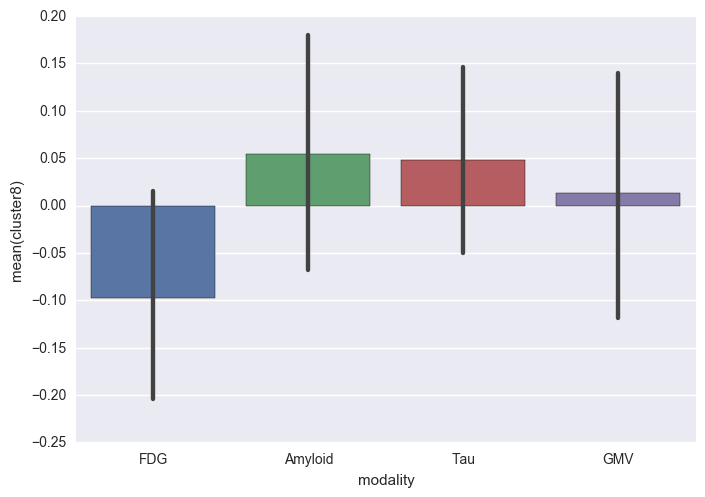

In [55]:
plt.close()
sns.barplot(x = 'modality',y='cluster8',data=ndf)
plt.show()

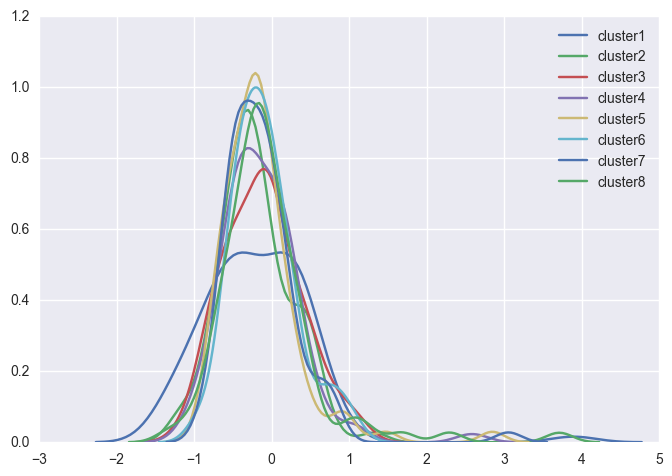

In [61]:
plt.close()
for i in range(1,9):
    sns.kdeplot(ndf[ndf.modality=='FDG']['cluster%s'%i])
plt.show()

In [63]:
def multihist(modal):
    for i in range(1,9):
        sns.kdeplot(ndf[ndf.modality==modal]['cluster%s'%i])

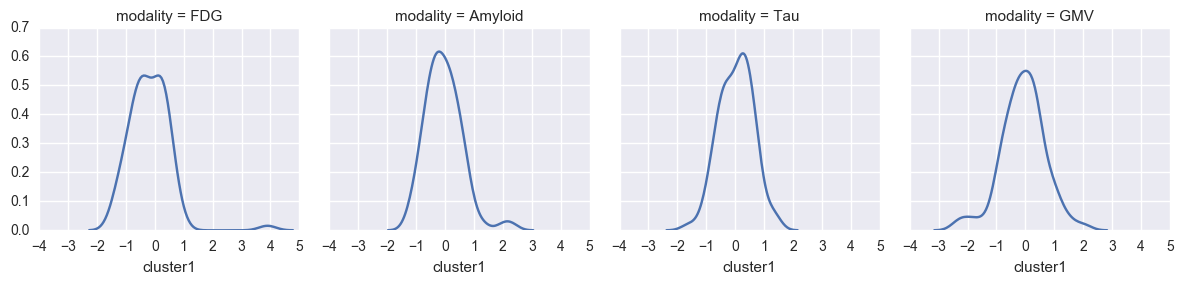

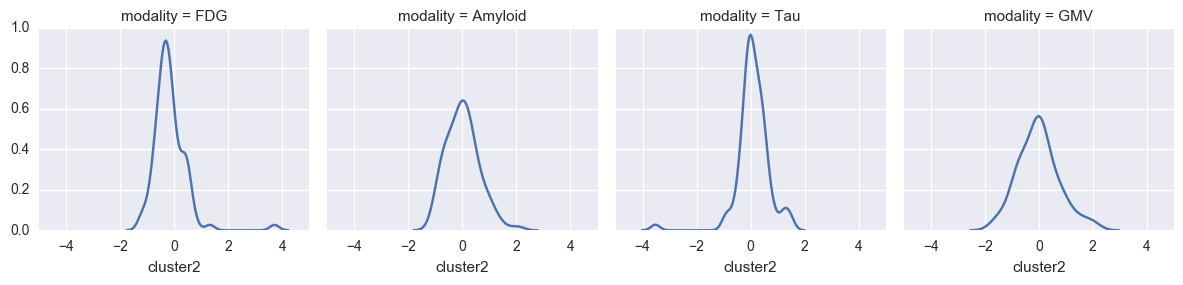

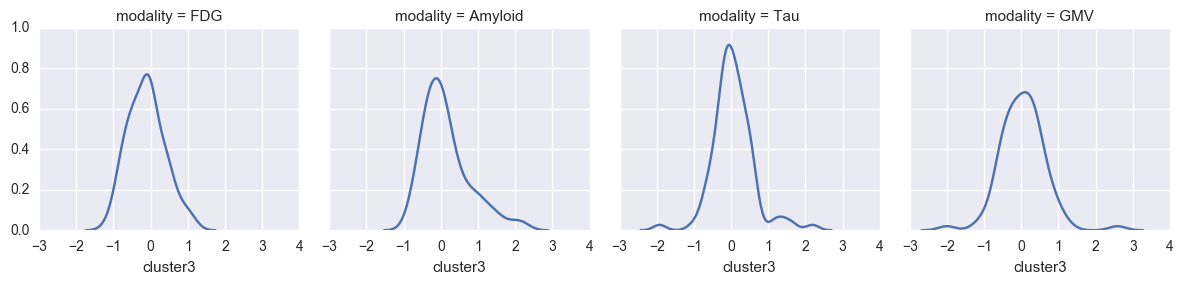

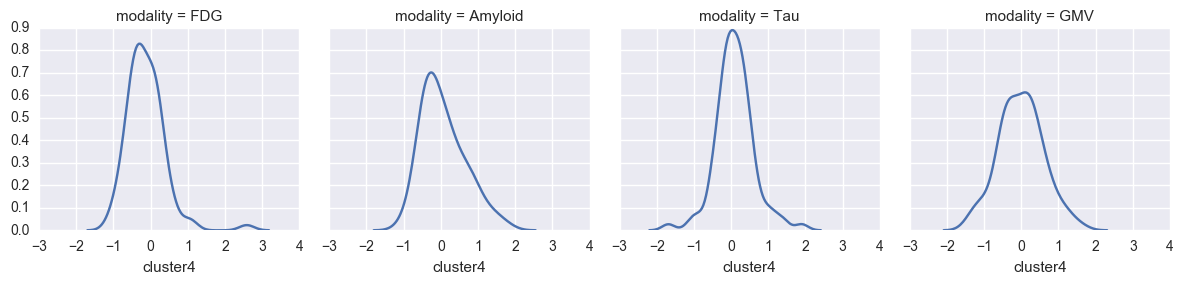

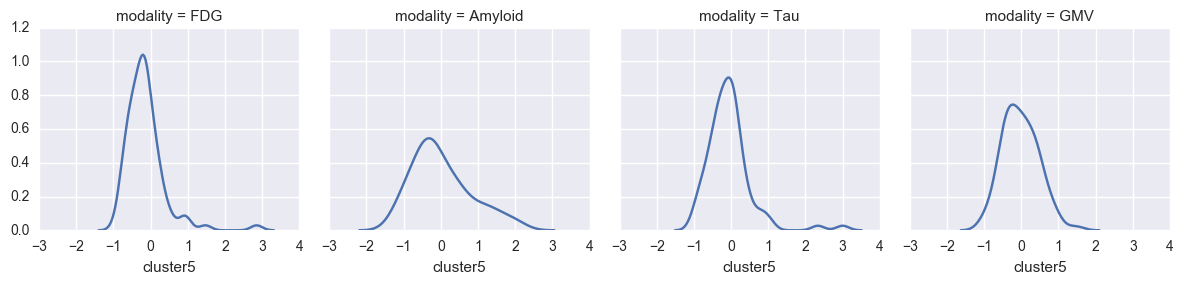

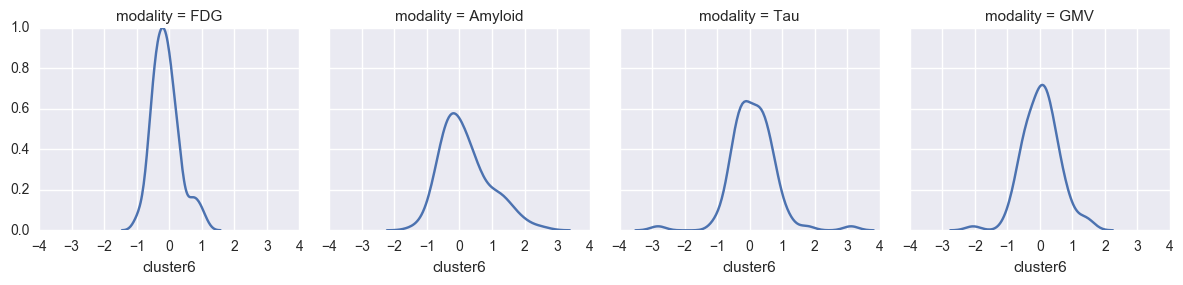

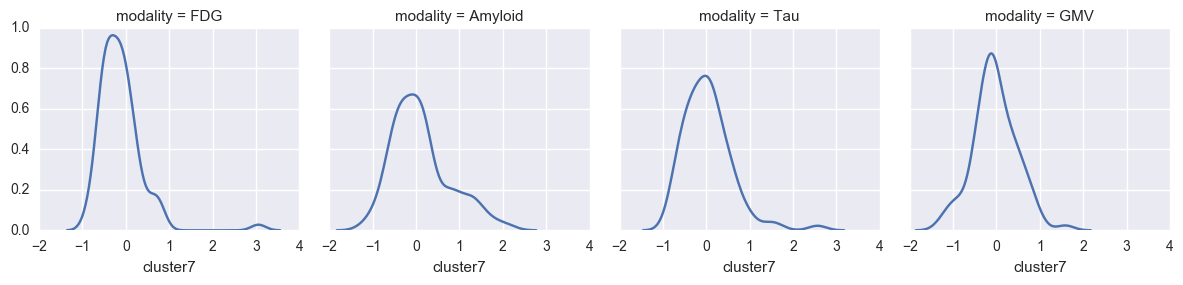

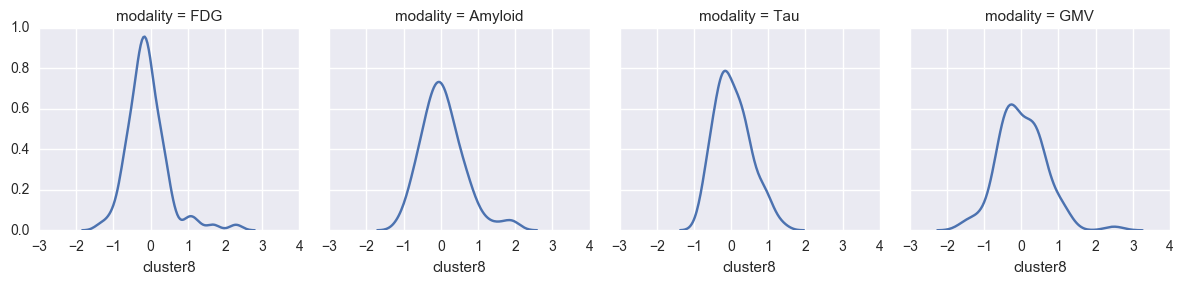

In [72]:
plt.close()
for i in range(1,9):
    g = sns.FacetGrid(ndf,col='modality')
    g = g.map(sns.kdeplot,'cluster%s'%i)
plt.show()